# Balancing Privacy and Accuracy in Machine Learning Models with Differential Privacy

## 1. Introduction & Problem Statement

This project explores how **Differential Privacy Stochastic Gradient Descent (DP-SGD)** and **Model Agnostic Private Learning (MAPL)** impact machine learning models. Specifically, we examine whether DP techniques interfere with model accuracy and the evolution of machine learning.

## 2. Setup - Install Required Packages

Run the code below if there are missing packages:

In [ ]:
%pip install matplotlib
%pip install seaborn
%pip install pandas numpy
%pip install scikit-learn
%pip install ucimlrepo


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 3. Data Exploration & Understanding

We are importing the relevant libraries and getting the data:

In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo #to retrieve the dataset

# Getting the data
dataset_id = 891  # our chosen dataset
dataset = fetch_ucirepo(id=dataset_id)
df = dataset.data.original

# # Previous way to retrieve the dataset (dor documentation)
# url = 'https://archive.ics.uci.edu/static/public/891/data.csv'
# df = pd.read_csv(url)

# Set display options
pd.set_option('display.max_columns', None)


We have observed that the dataset contains 253,680 records with 23 features:

In [13]:
# Checking basic Dataset Information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (253680, 23)

First 5 rows:


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1,1,1,40,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4


We have observed that all features are stored as integer data types:

The following table shows the features and their descriptions:

| Variable Name     | Role    | Type    | Description                                                                 |
|-------------------|---------|---------|-----------------------------------------------------------------------------|
| ID                | ID      | Integer | Patient ID                                                                  |
| Diabetes_binary   | Target  | Binary  | 0 = no diabetes 1 = prediabetes or diabetes                                 |
| HighBP            | Feature | Binary  | 0 = no high BP 1 = high BP                                                  |
| HighChol          | Feature | Binary  | 0 = no high cholesterol 1 = high cholesterol                                |
| CholCheck         | Feature | Binary  | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years    |
| BMI               | Feature | Integer | Body Mass Index                                                             |
| Smoker            | Feature | Binary  | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes |
| Stroke            | Feature | Binary  | (Ever told) you had a stroke. 0 = no 1 = yes                                |
| HeartDiseaseorAttack | Feature | Binary | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes  |
| PhysActivity      | Feature | Binary  | physical activity in past 30 days - not including job 0 = no 1 = yes        |
| Fruits            | Feature | Binary  | Consume Fruit 1 or more times per day 0 = no 1 = yes                        |
| Veggies           | Feature | Binary  | Consume Vegetables 1 or more times per day 0 = no 1 = yes                   |
| HvyAlcoholConsump | Feature | Binary  | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes |
| AnyHealthcare     | Feature | Binary  | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes |
| NoDocbcCost       | Feature | Binary  | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes |
| GenHlth           | Feature | Integer | General health: 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor |
| MentHlth          | Feature | Integer | For how many days during the past 30 days was your mental health not good? scale 1-30 days |
| PhysHlth          | Feature | Integer | For how many days during the past 30 days was your physical health not good? scale 1-30 days |
| DiffWalk          | Feature | Binary  | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes   |
| Sex               | Feature | Binary  | 0 = female 1 = male                                                    |
| Age               | Feature | Integer | 13 levels, 1 = 18-24, 9 = 60-64, 13 = 80 or older              |
| Education         | Feature | Integer | 6 levels, 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8, 3 = Grades 9 through 11, 4 = Grade 12 or GED, 5 = College 1 year to 3 years, 6 = College 4 years or more |
| Income            | Feature | Integer | 8 levels, 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more |


In [14]:
# Checking data types
print("\nData Types:")
print(df.dtypes)


Data Types:
ID                      int64
Diabetes_binary         int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


We have observed basic statistics for the features:

In [15]:
# Checking basic statistics
print("\nBasic Statistics:")
print(df.describe())


Basic Statistics:
                  ID  Diabetes_binary         HighBP       HighChol  \
count  253680.000000    253680.000000  253680.000000  253680.000000   
mean   126839.500000         0.139333       0.429001       0.424121   
std     73231.252481         0.346294       0.494934       0.494210   
min         0.000000         0.000000       0.000000       0.000000   
25%     63419.750000         0.000000       0.000000       0.000000   
50%    126839.500000         0.000000       0.000000       0.000000   
75%    190259.250000         0.000000       1.000000       1.000000   
max    253679.000000         1.000000       1.000000       1.000000   

           CholCheck            BMI         Smoker         Stroke  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.962670      28.382364       0.443169       0.040571   
std         0.189571       6.608694       0.496761       0.197294   
min         0.000000      12.000000       0.000000       0.000000

We have observed that there are no missing values (as stated in the dataset description):

In [16]:
# Checking for missing values
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


ID                      0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

We have observed that the dataset only has 13.93% records with diabetes. We will address this imbalance later during data cleaning and preprocessing:

In [17]:
# Checking distribution of dataset
diabetes_counts = df['Diabetes_binary'].value_counts()
print("Distribution of target variable:")
print(diabetes_counts)
print(f"Percentage of records with diabetes: {diabetes_counts[1]/len(df)*100:.2f}%")

Distribution of target variable:
Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64
Percentage of records with diabetes: 13.93%


We have observed a basic relationship between the features using a correlation matrix. We still need to explain what we can see from this:

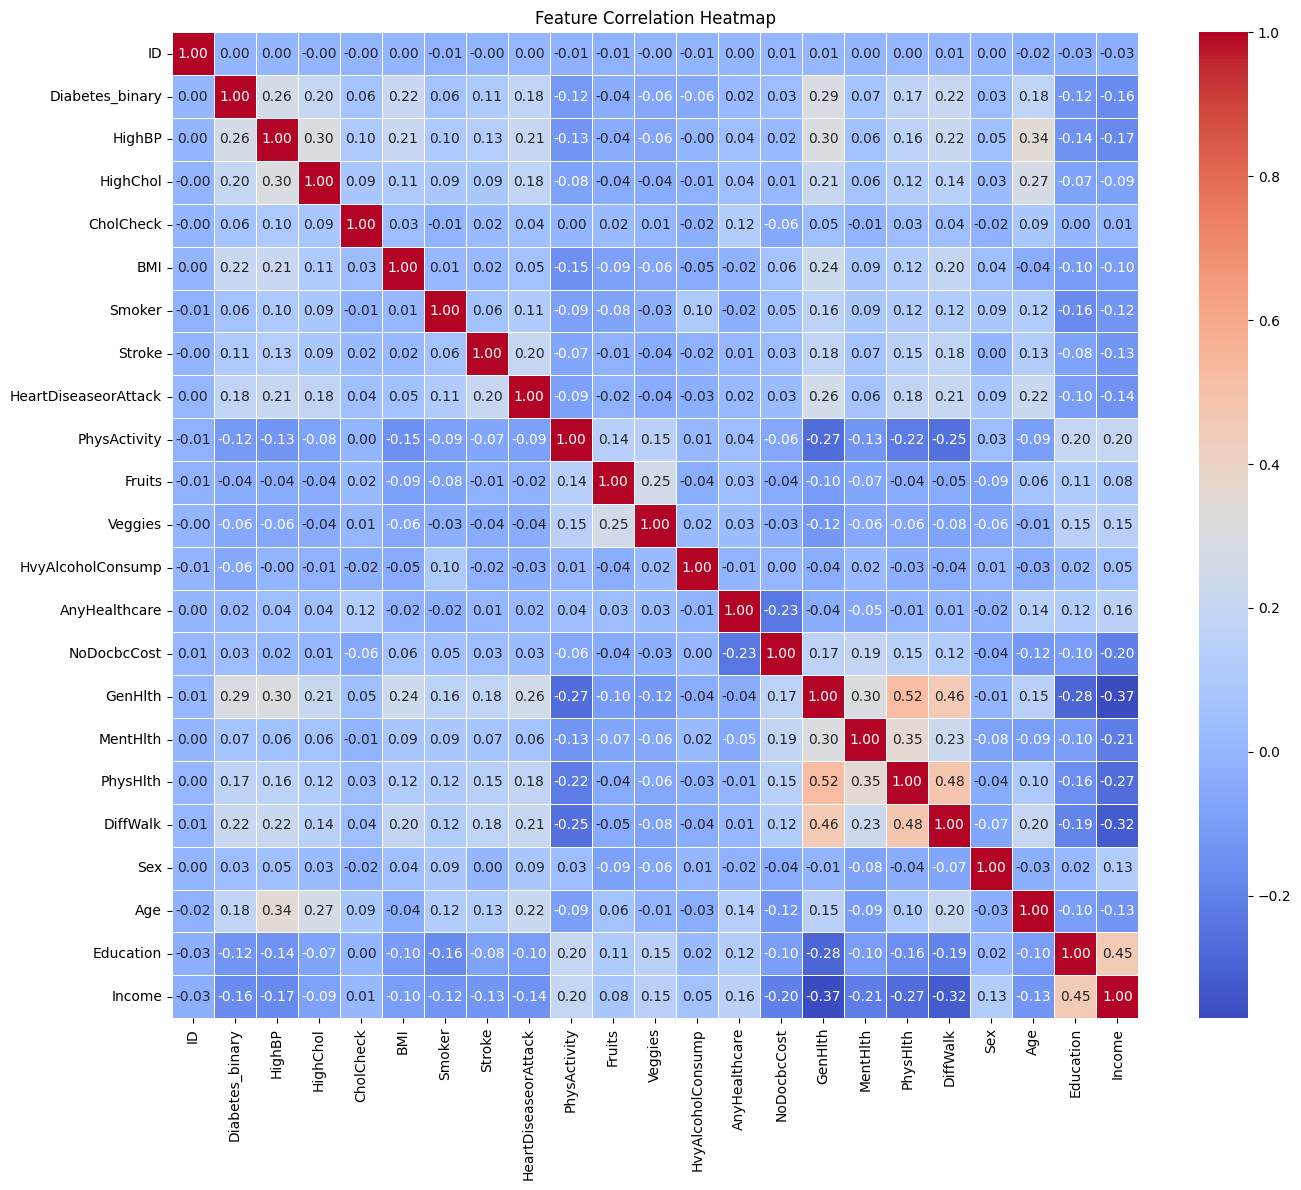


Features correlated with Diabetes (sorted):
Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
ID                      0.004268
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


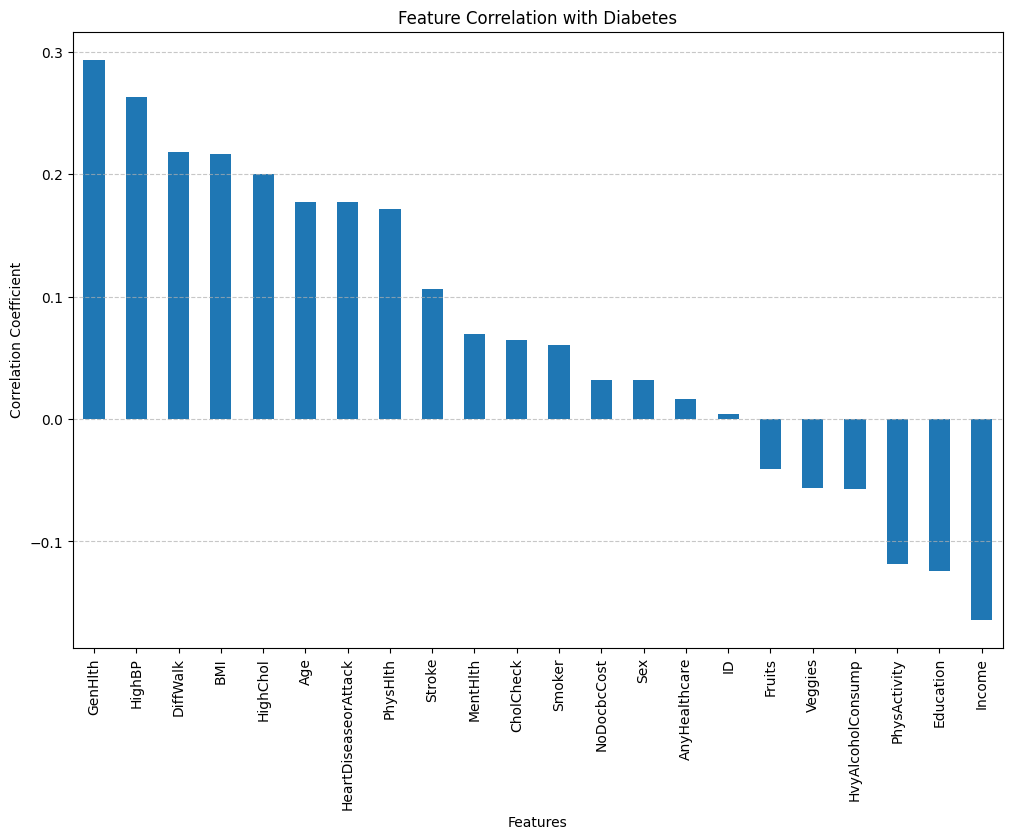

In [18]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# Focus on correlations with the target variable
diabetes_correlations = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
print("\nFeatures correlated with Diabetes (sorted):")
print(diabetes_correlations)

# Visualize correlations with the target
plt.figure(figsize=(12, 8))
diabetes_correlations[1:].plot(kind='bar')  # Exclude self-correlation
plt.title("Feature Correlation with Diabetes")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Feature Engineering & Selection

We need to explain which features we have chosen based on the data exploration above.

## 5. Data Cleaning & Preprocessing

We need to explain what we are doing:

In [19]:

num_with_diabetes = df['Diabetes_binary'].value_counts()[1]

print("\nOriginal Dataset:")
print(f"- Total samples in the original dataset: {len(df)}")
print(f"- Samples with diabetes (class 1): {num_with_diabetes}")
print(f"- Samples without diabetes (class 0): {df['Diabetes_binary'].value_counts()[0]}")


df_no_diabetes = df[df['Diabetes_binary'] == 0].sample(n=num_with_diabetes, random_state=42)
df_with_diabetes = df[df['Diabetes_binary'] == 1]


df_balanced = pd.concat([df_no_diabetes, df_with_diabetes])
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


print("\nBalanced Dataset:")
print(f"- Total samples in the balanced dataset: {len(df_balanced)}")
print(df_balanced['Diabetes_binary'].value_counts())

print(f"- Samples without diabetes (class 0): {df_balanced['Diabetes_binary'].value_counts()[0]}")
print(f"- Samples with diabetes (class 1): {df_balanced['Diabetes_binary'].value_counts()[1]}")



Original Dataset:
- Total samples in the original dataset: 253680
- Samples with diabetes (class 1): 35346
- Samples without diabetes (class 0): 218334

Balanced Dataset:
- Total samples in the balanced dataset: 70692
Diabetes_binary
1    35346
0    35346
Name: count, dtype: int64
- Samples without diabetes (class 0): 35346
- Samples with diabetes (class 1): 35346


### 5.1 Data Splitting Strategy 

Before training our models we have to split the data into a training set and a test set. We have chosen a 80/20 split, which ensures we have enough training data for the model to learn patterns and enough data for performance evaluation. We have used stratified sampling to ensure that both the training set and test set includes a 50/50 split of records having diabetes or not.

In [20]:
from sklearn.model_selection import train_test_split

X_balanced = df_balanced.drop('Diabetes_binary', axis=1) # drop the target column
y_balanced = df_balanced['Diabetes_binary']

X_imbalanced = df.drop('Diabetes_binary', axis=1) #drop the target column
y_imbalanced = df['Diabetes_binary']

# split into train (70%) and temp (30%)
X_train_bal, X_temp_bal, y_train_bal, y_temp_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)

# split temp set into validation (10%) and test (20%)
X_val_bal, X_test_bal, y_val_bal, y_test_bal = train_test_split(
    X_temp_bal, y_temp_bal, test_size=2/3, random_state=42, stratify=y_temp_bal
)

# Imbalanced dataset
X_train_imb, X_temp_imb, y_train_imb, y_temp_imb = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.3, random_state=42, stratify=y_imbalanced
)

X_val_imb, X_test_imb, y_val_imb, y_test_imb = train_test_split(
    X_temp_imb, y_temp_imb, test_size=2/3, random_state=42, stratify=y_temp_imb
)

print(f"Balanced Training set: {X_train_bal.shape[0]} samples")
print(f"Balanced Validation set: {X_val_bal.shape[0]} samples")
print(f"Balanced Testing set: {X_test_bal.shape[0]} samples")

print("\nClass distribution in balanced training set:")
print(y_train_bal.value_counts(normalize=True))

print("\nClass distribution in balanced validation set:")
print(y_val_bal.value_counts(normalize=True))

print("\nClass distribution in balanced testing set:")
print(y_test_bal.value_counts(normalize=True))

print(f"\nImbalanced Training set: {X_train_imb.shape[0]} samples")
print(f"Imbalanced Validation set: {X_val_imb.shape[0]} samples")
print(f"Imbalanced Testing set: {X_test_imb.shape[0]} samples")

print("\nClass distribution in imbalanced training set:")
print(y_train_imb.value_counts(normalize=True))

print("\nClass distribution in imbalanced validation set:")
print(y_val_imb.value_counts(normalize=True))

print("\nClass distribution in imbalanced testing set:")
print(y_test_imb.value_counts(normalize=True))


Balanced Training set: 49484 samples
Balanced Validation set: 7069 samples
Balanced Testing set: 14139 samples

Class distribution in balanced training set:
Diabetes_binary
1    0.5
0    0.5
Name: proportion, dtype: float64

Class distribution in balanced validation set:
Diabetes_binary
1    0.500071
0    0.499929
Name: proportion, dtype: float64

Class distribution in balanced testing set:
Diabetes_binary
0    0.500035
1    0.499965
Name: proportion, dtype: float64

Imbalanced Training set: 177576 samples
Imbalanced Validation set: 25368 samples
Imbalanced Testing set: 50736 samples

Class distribution in imbalanced training set:
Diabetes_binary
0    0.860668
1    0.139332
Name: proportion, dtype: float64

Class distribution in imbalanced validation set:
Diabetes_binary
0    0.860651
1    0.139349
Name: proportion, dtype: float64

Class distribution in imbalanced testing set:
Diabetes_binary
0    0.860671
1    0.139329
Name: proportion, dtype: float64


## 6. Machine Learning Model without Differential Privacy

We are importing the relevant libraries to train our models:

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### 6.1 Using all features

In [22]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred = rf_model.predict(X_test_bal)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test_bal, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred))


Accuracy: 0.7451729259495014

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.72      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.74     14139
weighted avg       0.75      0.75      0.74     14139



### 6.2 Using selected features (balanced dataset)

In [23]:
# Define important features
important_features = ['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 
                      'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth', 
                      'CholCheck', 'Smoker', 'NoDocbcCost', 'Sex', 'AnyHealthcare', 
                      'Income', 'Education']

# Using the balanced dataset
X = df_balanced[important_features]
y = df_balanced['Diabetes_binary']

# Train with the balanced dataset split
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# Make predictions
y_pred = rf_model.predict(X_test_bal)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test_bal, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred))


Accuracy: 0.7451729259495014

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.72      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.74     14139
weighted avg       0.75      0.75      0.74     14139



- Precision: How many predicted positives are actually positive?
- Recall: How many actual positives were correctly identified?
- F1-score: A balance between precision and recall.
- Support: Number of actual occurrences of each class.

### 6.3 Using imbalanced dataset

In [24]:
important_features = ['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 
                      'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth', 
                      'CholCheck', 'Smoker', 'NoDocbcCost', 'Sex', 'AnyHealthcare', 
                      'Income', 'Education']

X = df[important_features]  
y = df['Diabetes_binary']

# Train with the imbalanced one
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_imb, y_train_imb)

# Make predictions
y_pred = rf_model.predict(X_test_imb)

# Checking accuracy and classification report
print("Accuracy:", accuracy_score(y_test_imb, y_pred))
print("\nClassification Report:")
print(classification_report(y_test_imb, y_pred))


Accuracy: 0.8631346578366446

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43667
           1       0.53      0.15      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



**This model over prioritizes the majority class (0 - no diabetes), as it was trained with the imbalanced data.**

Comparison:

Balanced data (6.2) - Lower accuracy (74%) but much better at detecting class 1 - diabetes (79%), as it gives the same importance to both classes.

Imbalanced data (6.3) - Higher accuracy (86%) but poor detection of class 1 - diabetes (16%).

### 6.4 - Using validation set

In [25]:
important_features = ['GenHlth', 'HighBP', 'DiffWalk', 'BMI', 'HighChol', 'Age', 
                      'HeartDiseaseorAttack', 'PhysHlth', 'Stroke', 'MentHlth', 
                      'CholCheck', 'Smoker', 'NoDocbcCost', 'Sex', 'AnyHealthcare', 
                      'Income', 'Education']

X_balanced = df_balanced[important_features]
y_balanced = df_balanced['Diabetes_binary']

rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

rf_model.fit(X_train_bal, y_train_bal)

y_pred_bal = rf_model.predict(X_test_bal)

# Checking accuracy and classification report for balanced test set
print("Balanced Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("\nBalanced Classification Report:")
print(classification_report(y_test_bal, y_pred_bal))

# evaluate validation set - for documentation
y_pred_val_bal = rf_model.predict(X_val_bal)
print("\nBalanced Validation Accuracy:", accuracy_score(y_val_bal, y_pred_val_bal))
print("\nBalanced Validation Classification Report:")
print(classification_report(y_val_bal, y_pred_val_bal))


Balanced Accuracy: 0.7451729259495014

Balanced Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7070
           1       0.72      0.79      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.74     14139
weighted avg       0.75      0.75      0.74     14139


Balanced Validation Accuracy: 0.7357476304993634

Balanced Validation Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72      3534
           1       0.72      0.78      0.75      3535

    accuracy                           0.74      7069
   macro avg       0.74      0.74      0.74      7069
weighted avg       0.74      0.74      0.74      7069



## 7. Applying Differential Privacy Techniques

Missing

## 8. Evaluation & Performance Metrics

Missing

## 9. Results & Discussion

Missing

## 10. Conclusion & Future Work

Missing